# Avinash A Godi
# Python Assignment02

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
color = sns.color_palette()
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("Ecommerce - UK Retailer.csv" ,encoding= 'ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# 2. Check for missing values in all columns and replace them with the appropriate metric (Mean/Median/Mode)

In [5]:
df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

In [6]:
df['CustomerID'].fillna(df['CustomerID'].mode()[0], inplace=True)
df['Description'].fillna(df['Description'].mode()[0], inplace=True)

In [7]:
for col_name in df.columns: 
    print ("column:",col_name,".Missing:",sum(df[col_name].isnull()))

column: InvoiceNo .Missing: 0
column: StockCode .Missing: 0
column: Description .Missing: 0
column: Quantity .Missing: 0
column: InvoiceDate .Missing: 0
column: UnitPrice .Missing: 0
column: CustomerID .Missing: 0
column: Country .Missing: 0


# 3. Remove duplicate rows

In [8]:
df.drop_duplicates()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


# 4. Remove rows which have negative values in Quantity column

In [9]:
df = df[(df['Quantity'] >= 0)]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531285 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    531285 non-null  object 
 1   StockCode    531285 non-null  object 
 2   Description  531285 non-null  object 
 3   Quantity     531285 non-null  int64  
 4   InvoiceDate  531285 non-null  object 
 5   UnitPrice    531285 non-null  float64
 6   CustomerID   531285 non-null  float64
 7   Country      531285 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.5+ MB


# 5. Add the columns - Month, Day and Hour for the invoice

In [11]:
df["InvoiceDate"]=pd.to_datetime(df["InvoiceDate"])
type(df["InvoiceDate"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [12]:
df['Hour'] = df['InvoiceDate'].apply(lambda x: x.hour)
df['Month'] = df['InvoiceDate'].apply(lambda x: x.month)
df['Day'] = df['InvoiceDate'].apply(lambda x: x.weekday())
df['year_month']=df.InvoiceDate.map(lambda x: 100*x.year + x.month)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Hour,Month,Day,year_month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,8,12,2,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,12,2,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,8,12,2,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,12,2,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,12,2,201012


In [13]:
dmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}

In [14]:
df['Day'] = df['Day'].map(dmap)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Hour,Month,Day,year_month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,8,12,Wed,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,12,Wed,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,8,12,Wed,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,12,Wed,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,12,Wed,201012


# 6. How many orders made by the customers?

In [15]:
orders=df.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count()
orders.head()

,CustomerID,Country,InvoiceNo
0,12346.0,United Kingdom,1
1,12347.0,Iceland,182
2,12348.0,Finland,31
3,12349.0,Italy,73
4,12350.0,Norway,17


# 7. TOP 5 customers with higher number of orders

In [16]:
print('The TOP 5 customers with most number of orders')
orders.sort_values(by='InvoiceNo', ascending=False).head()

The TOP 5 customers with most number of orders


,CustomerID,Country,InvoiceNo
4026,17841.0,United Kingdom,139788
1888,14911.0,EIRE,5677
1298,14096.0,United Kingdom,5111
334,12748.0,United Kingdom,4596
1670,14606.0,United Kingdom,2700


# 8. How much money spent by the customers?

In [17]:
df['AmountSpent'] = df['Quantity'] * df['UnitPrice']#add new column AmountSpent

In [18]:
money_spent = df.groupby(by=['CustomerID','Country'], as_index=False)['AmountSpent'].sum()
money_spent.head()

,CustomerID,Country,AmountSpent
0,12346.0,United Kingdom,77183.60
1,12347.0,Iceland,4310.00
2,12348.0,Finland,1797.24
3,12349.0,Italy,1757.55
4,12350.0,Norway,334.40


# 9. TOP 5 customers with highest money spent

In [19]:
print('The TOP 5 customers with highest money spent...')
money_spent.sort_values(by='AmountSpent', ascending=False).head()

The TOP 5 customers with highest money spent...


,CustomerID,Country,AmountSpent
4026,17841.0,United Kingdom,1735697.98
1698,14646.0,Netherlands,280206.02
4218,18102.0,United Kingdom,259657.30
3737,17450.0,United Kingdom,194550.79
3017,16446.0,United Kingdom,168472.50


# 10. How many orders per month?

In [20]:
df.groupby('InvoiceNo')['year_month'].unique().value_counts().sort_index()

TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


[201012]    1629
[201101]    1120
[201102]    1126
[201103]    1531
[201104]    1318
[201105]    1731
[201106]    1576
[201107]    1540
[201108]    1409
[201109]    1896
[201110]    2129
[201111]    2884
[201112]     839
Name: year_month, dtype: int64

# 11. How many orders per day?

In [21]:
df.groupby('InvoiceNo')['Day'].unique().value_counts().sort_index()

TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


[Fri]    3294
[Mon]    3237
[Sun]    2207
[Thu]    4408
[Tue]    3717
[Wed]    3865
Name: Day, dtype: int64

# 12. How many orders per hour?

In [22]:
df.groupby('InvoiceNo')['Hour'].unique().value_counts().sort_values()

TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


[11, 12]       1
[6]            1
[20]          18
[7]           29
[19]         146
[18]         209
[8]          568
[17]         738
[16]        1406
[9]         1538
[10]        2431
[11]        2472
[15]        2474
[14]        2557
[13]        2818
[12]        3322
Name: Hour, dtype: int64

# 13. How many orders for each country?

In [23]:
df.groupby('Country')['InvoiceNo'].count().sort_values()

Country
Saudi Arabia                 9
Bahrain                     18
Czech Republic              25
Brazil                      32
Lithuania                   35
Lebanon                     45
RSA                         58
European Community          60
United Arab Emirates        68
Malta                      112
Greece                     145
Canada                     151
USA                        179
Iceland                    182
Singapore                  222
Hong Kong                  284
Israel                     295
Japan                      321
Poland                     330
Denmark                    380
Austria                    398
Unspecified                446
Sweden                     451
Cyprus                     614
Finland                    685
Channel Islands            748
Italy                      758
Norway                    1072
Australia                 1185
Portugal                  1501
Switzerland               1967
Belgium                   2031


# 14. Orders trend across months

In [24]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']#for adding revenue column
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Hour,Month,Day,year_month,AmountSpent,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,8,12,Wed,201012,15.30,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,12,Wed,201012,20.34,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,8,12,Wed,201012,22.00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,12,Wed,201012,20.34,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,12,Wed,201012,20.34,20.34


In [25]:
df.groupby(by=['year_month'])['Revenue'].sum().sort_index()

year_month
201012     823746.140
201101     691364.560
201102     523631.890
201103     717639.360
201104     537808.621
201105     770536.020
201106     761739.900
201107     719221.191
201108     737014.260
201109    1058590.172
201110    1154979.300
201111    1509496.330
201112     638792.680
Name: Revenue, dtype: float64

# 15. How much money spent by each country?

In [26]:
df.groupby('Country')['AmountSpent'].sum().sort_values()

Country
Saudi Arabia                145.920
Bahrain                     754.140
Czech Republic              826.740
RSA                        1002.310
Brazil                     1143.600
European Community         1300.250
Lithuania                  1661.060
Lebanon                    1693.880
United Arab Emirates       1902.280
Malta                      2725.590
USA                        3580.390
Canada                     3666.380
Iceland                    4310.000
Unspecified                4749.790
Greece                     4760.520
Poland                     7334.650
Israel                     8135.260
Austria                   10198.680
Cyprus                    13590.380
Hong Kong                 15691.800
Italy                     17483.240
Denmark                   18955.340
Channel Islands           20450.440
Singapore                 21279.290
Finland                   22546.080
Portugal                  33747.100
Norway                    36165.440
Japan               

# Discover patterns for Unit Price

In [27]:
df.UnitPrice.describe()

count    531285.000000
mean          3.857296
std          41.810047
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       13541.330000
Name: UnitPrice, dtype: float64

In [28]:
df_free = df[df.UnitPrice == 0]
df_free.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Hour,Month,Day,year_month,AmountSpent,Revenue
622,536414,22139,WHITE HANGING HEART T-LIGHT HOLDER,56,2010-12-01 11:52:00,0.0,17841.0,United Kingdom,11,12,Wed,201012,0.0,0.0
1970,536545,21134,WHITE HANGING HEART T-LIGHT HOLDER,1,2010-12-01 14:32:00,0.0,17841.0,United Kingdom,14,12,Wed,201012,0.0,0.0
1971,536546,22145,WHITE HANGING HEART T-LIGHT HOLDER,1,2010-12-01 14:33:00,0.0,17841.0,United Kingdom,14,12,Wed,201012,0.0,0.0
1972,536547,37509,WHITE HANGING HEART T-LIGHT HOLDER,1,2010-12-01 14:33:00,0.0,17841.0,United Kingdom,14,12,Wed,201012,0.0,0.0
1987,536549,85226A,WHITE HANGING HEART T-LIGHT HOLDER,1,2010-12-01 14:34:00,0.0,17841.0,United Kingdom,14,12,Wed,201012,0.0,0.0


In [29]:
df_free.year_month.value_counts().sort_index()

201012    203
201101     44
201102     79
201103    112
201104     75
201105    128
201106     79
201107     71
201108     81
201109     62
201110     92
201111    129
201112     24
Name: year_month, dtype: int64

# 1. Perform Basic EDA

a. Boxplot – All Numeric Variables

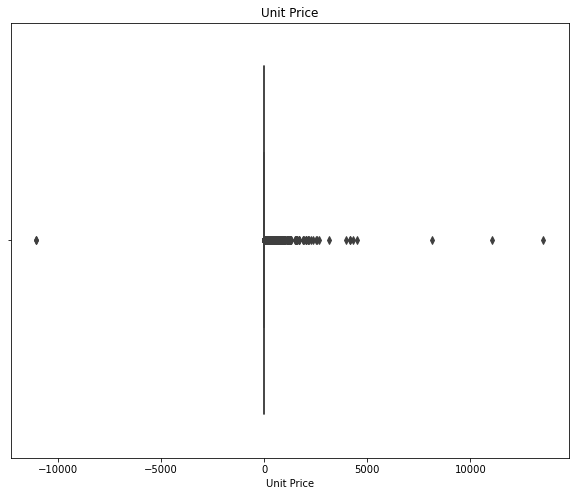

In [30]:
plt.subplots(figsize=(10,8))
sns.boxplot(df.UnitPrice)

plt.xlabel('Unit Price')
plt.title('Unit Price')
plt.show()

b. Histogram – All Numeric Variables

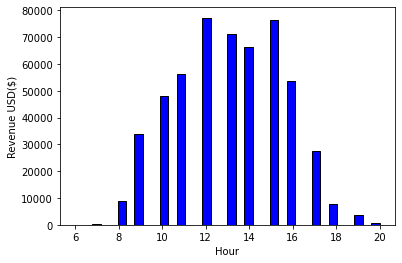

In [31]:
plt.hist(df['Hour'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))
plt.xlabel('Hour')
plt.ylabel('Revenue USD($)')
plt.show()

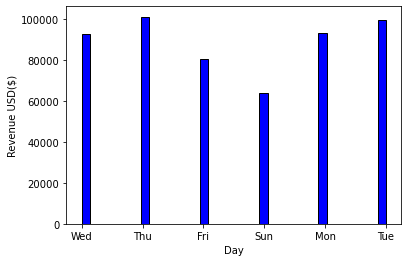

In [32]:
plt.hist(df['Day'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))
plt.xlabel('Day')
plt.ylabel('Revenue USD($)')
plt.show()

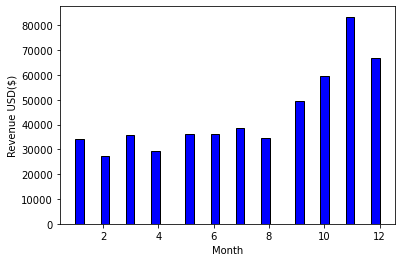

In [33]:
plt.hist(df['Month'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))
plt.xlabel('Month')
plt.ylabel('Revenue USD($)')
plt.show()

c. Distribution Plot – All Numeric Variables

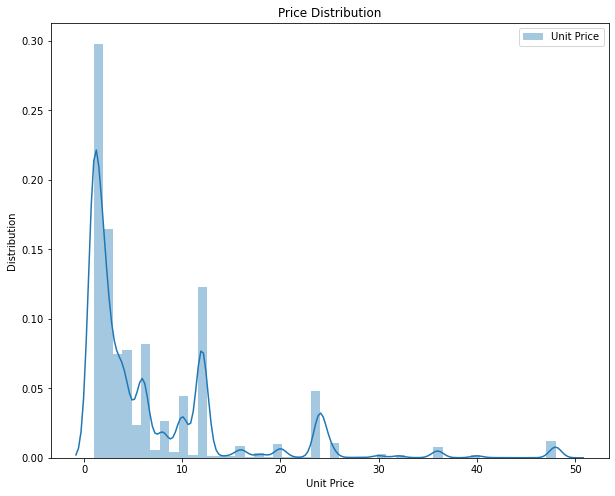

In [34]:
plt.subplots(figsize=(10,8))
sns.distplot(df.Quantity[df.Quantity < 50], label='Unit Price').legend()

plt.xlabel('Unit Price')
plt.ylabel('Distribution')
plt.title('Price Distribution')
plt.show()

d. Aggregation for all numerical Columns

In [35]:
df.describe()

,Quantity,UnitPrice,CustomerID,Hour,Month,year_month,AmountSpent,Revenue
count,531285.000000,531285.000000,531285.000000,531285.000000,531285.000000,531285.000000,531285.00000,531285.00000
mean,10.655262,3.857296,15933.573639,13.076259,7.560244,201099.714549,20.03550,20.03550
std,156.830323,41.810047,1848.667336,2.438303,3.508717,25.800406,270.91237,270.91237
min,1.000000,-11062.060000,12346.000000,6.000000,1.000000,201012.000000,-11062.06000,-11062.06000
25%,1.000000,1.250000,14388.000000,11.000000,5.000000,201103.000000,3.75000,3.75000
50%,3.000000,2.080000,16271.000000,13.000000,8.000000,201107.000000,9.90000,9.90000
75%,10.000000,4.130000,17841.000000,15.000000,11.000000,201110.000000,17.70000,17.70000
max,80995.000000,13541.330000,18287.000000,20.000000,12.000000,201112.000000,168469.60000,168469.60000


e. Unique Values across all columns

In [36]:
pd.unique(df[['Country','Description','StockCode','Country']].values.ravel())

array(['United Kingdom', 'WHITE HANGING HEART T-LIGHT HOLDER', '85123A',
       ..., 'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE', '23843'], dtype=object)

f. Duplicate values across all columns

In [37]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Length: 531285, dtype: bool

In [38]:
list(df.columns)

['InvoiceNo',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'UnitPrice',
 'CustomerID',
 'Country',
 'Hour',
 'Month',
 'Day',
 'year_month',
 'AmountSpent',
 'Revenue']

g. Correlation – Heatmap - All Numeric Variables

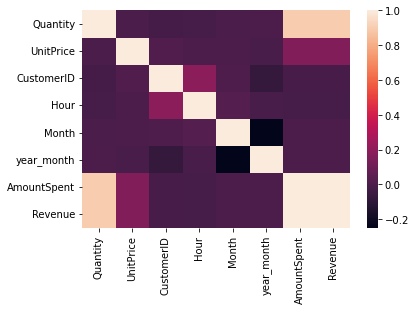

In [39]:
sns.heatmap(df.corr())
plt.show()

h. Regression Plot - All Numeric Variables

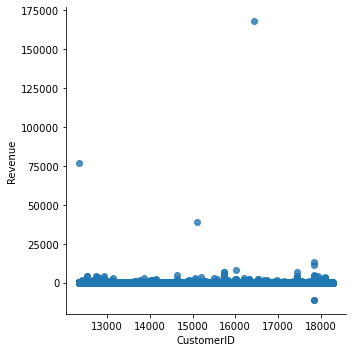

In [29]:
sns.lmplot(x='CustomerID',y='Revenue', data=df)

i. Bar Plot – Every Categorical Variable vs every Numerical Variable

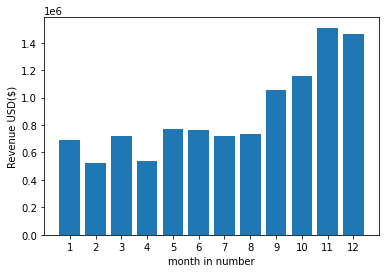

In [41]:
result=df.groupby('Month').sum()
month=range(1,13)
plt.bar(month,result['Revenue'])
plt.xticks(month)
plt.xlabel('month in number')
plt.ylabel('Revenue USD($)')
plt.show()

j. Pair plot - All Numeric Variables

In [42]:
#sns.pairplot(df,vars=["Quantity","UnitPrice","Revenue","Month","Day"])
#plt.show() (cannot able to plot pair plot in my device, please consider the code)

k. Line chart to show the trend of data - All Numeric/Date Variables

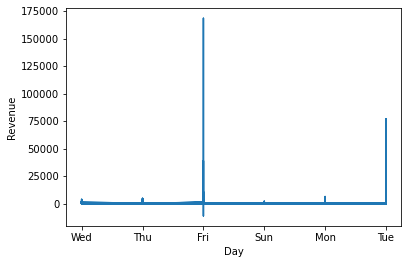

In [43]:
plt.plot(df['Day'],df['Revenue'])
plt.xlabel('Day')
plt.ylabel('Revenue')
plt.show()

l. Plot the skewness - All Numeric Variables

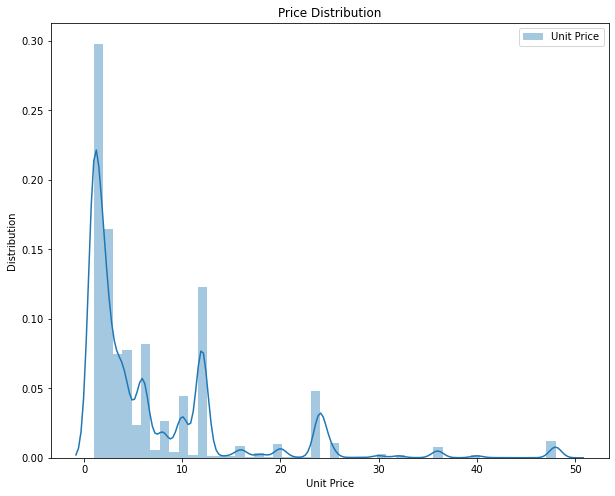

In [44]:
plt.subplots(figsize=(10,8))
sns.distplot(df.Quantity[df.Quantity < 50], label='Unit Price').legend()

plt.xlabel('Unit Price')
plt.ylabel('Distribution')
plt.title('Price Distribution')
plt.show()

In [45]:
df.skew(axis=0,skipna=True)

Quantity       460.130967
UnitPrice       60.552895
CustomerID      -0.407145
Hour             0.000429
Month           -0.417780
year_month      -3.047498
AmountSpent    502.218534
Revenue        502.218534
dtype: float64

In [46]:
df.skew(axis=1,skipna=True)

0         2.786001
1         2.786009
2         2.786012
3         2.786009
4         2.786009
            ...   
541904    2.806818
541905    2.806818
541906    2.806823
541907    2.806823
541908    2.806821
Length: 531285, dtype: float64

# Thank You